In [9]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
from pylab import rcParams

rcParams['figure.figsize'] = 10, 5

plt.rc('text', usetex=True)
plt.rcParams['text.usetex']=True

plt.rc('font', family='sans-serif', weight='bold')

SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['figure.dpi'] = 500  

In [10]:
T = 1
rho = -0.9
n_steps = 1000
n_reps = 1000

In [11]:
t = np.linspace(0, T, n_steps)

def Wt(m,n):
    dt = m/n
    x = np.zeros(n)
    for i in range(1,n):
        x[i] = x[i-1] + np.random.normal(0,dt)
    return x


# computing correlation between the two BM n_reps times
corr = []
for i in range(n_reps):
    W_t_1 = Wt (T, n_steps)
    W_t_2 = rho * W_t_1 + np.sqrt( 1 - rho**2 ) * Wt (T, n_steps)
    corr_matr = np.corrcoef(W_t_1, W_t_2, rowvar=False)
    corr.append(corr_matr[0,1])

Mean correlation coefficient over 1000 reps of Brownian Motion with 1000 steps with rho = -0.9:  -0.8619751537193937


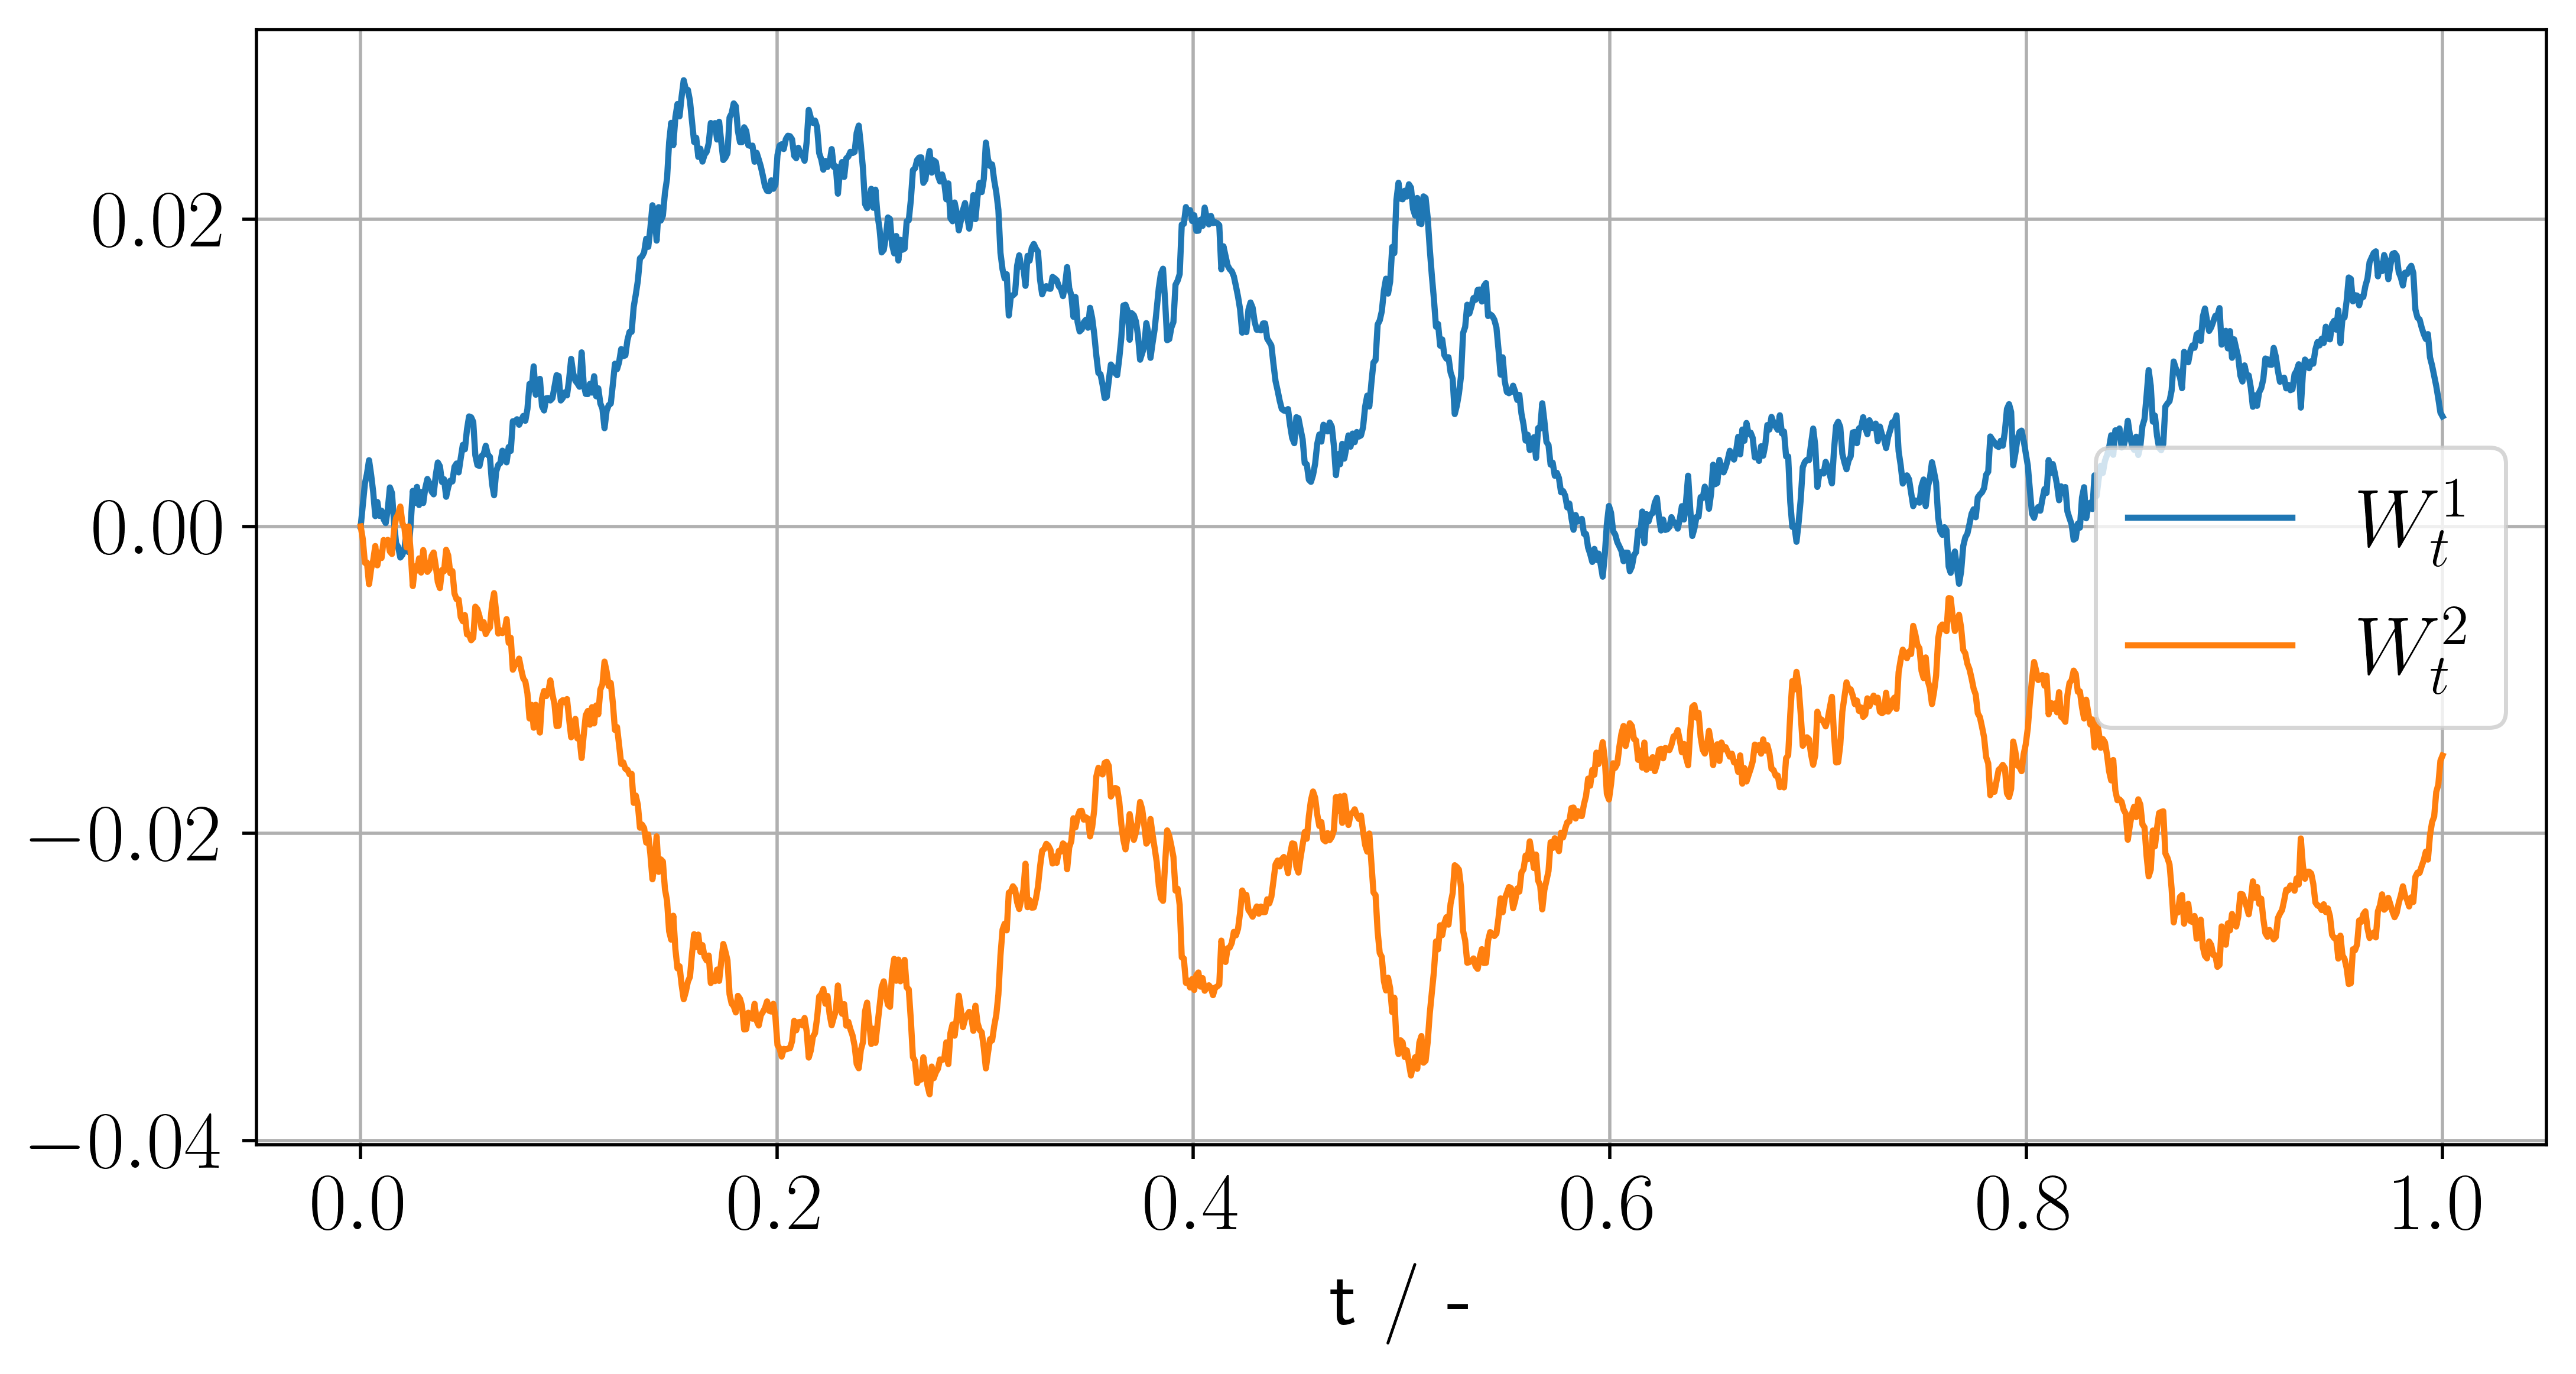

In [12]:
# plotting just the last two paths 
plt.plot(t, W_t_1, label ='$W^1_t$')
plt.plot(t, W_t_2, label ='$W^2_t$')
plt.xlabel('t / -')
plt.legend()
plt.grid()

print(f'Mean correlation coefficient over {n_reps} reps of Brownian Motion with {n_steps} steps with rho = {rho}: ', np.mean(corr))
